<a href="https://colab.research.google.com/github/Tasyasyaaaaa/PembelajaranMesin/blob/main/Clustering_LQ45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('/content/CPLQ45.xlsx')

print("Data Closing Price:")
print(data.head())

Data Closing Price:
                  DATE  ACES  BBRI  EXCL   ITMG  PTBA  ADRO  BBTN   GGRM  \
0  2024-02-01 00:00:00   715  5675  2000  26375  2530  2490  1265  20800   
1  2024-03-01 00:00:00   715  5600  2050  25750  2530  2410  1255  21025   
2  2024-04-01 00:00:00   735  5700  2090  26600  2650  2460  1295  20850   
3  2024-05-01 00:00:00   750  5750  2100  26775  2660  2440  1295  20900   
4  2024-08-01 00:00:00   735  5625  2110  27100  2630  2440  1285  20625   

   KLBF  ...  BBCA  ISAT  INKP  PGAS   UNTR  BBNI  ESSA  INTP  PGEO  UNVR  
0  1620  ...  9425  2480  8350  1140  23475  5375   560  9425  1265  3550  
1  1605  ...  9350  2460  8475  1135  23225  5350   565  9300  1280  3530  
2  1590  ...  9475  2440  8425  1145  23275  5600   590  9325  1285  3520  
3  1580  ...  9575  2480  8375  1160  23250  5575   570  9225  1280  3520  
4  1590  ...  9575  2370  8125  1135  23025  5575   575  9225  1230  3480  

[5 rows x 46 columns]


In [6]:
# === 3. Hitung Return Harian ===
returns = data.drop('DATE', axis=1).pct_change().dropna()

# Expected Return (mean harian)
expected_return = returns.mean()

# Variansi & Standar Deviasi
variance = returns.var()
std_dev = returns.std()

# Buat ringkasan
summary = pd.DataFrame({
    "Expected Return": expected_return,
    "Variance": variance,
    "Std Dev": std_dev
})

print("\nRingkasan Statistik Saham LQ45:")
print(summary)


Ringkasan Statistik Saham LQ45:
      Expected Return  Variance   Std Dev
ACES         0.000684  0.000528  0.022985
BBRI        -0.001228  0.000339  0.018409
EXCL         0.000696  0.000395  0.019870
ITMG         0.000152  0.000200  0.014137
PTBA         0.000536  0.000362  0.019032
ADRO         0.000480  0.001082  0.032898
BBTN        -0.000207  0.000474  0.021776
GGRM        -0.001788  0.000230  0.015162
KLBF        -0.000603  0.000279  0.016688
AMMN         0.001422  0.000745  0.027297
AKRA        -0.001055  0.000364  0.019078
BMRI        -0.000119  0.000371  0.019256
GOTO        -0.000333  0.001202  0.034667
MAPI        -0.000862  0.000789  0.028087
SIDO         0.000778  0.000324  0.018010
AMRT         0.000106  0.000330  0.018170
BRIS         0.002270  0.000729  0.027003
HRUM        -0.000825  0.000793  0.028152
MBMA        -0.000363  0.001141  0.033772
SMGR        -0.002628  0.000475  0.021792
ANTM        -0.000265  0.000567  0.023810
BRPT        -0.000963  0.001554  0.039416
I

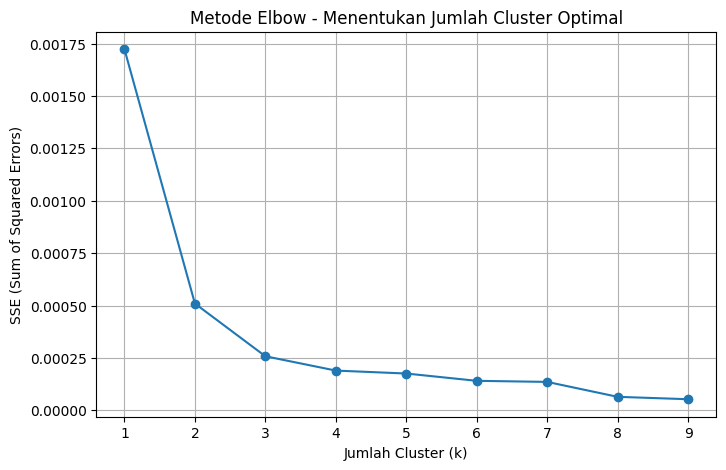

In [7]:
# === 4. Elbow Method (SSE) ===
X = summary[["Expected Return", "Std Dev"]].values

sse = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE
plt.figure(figsize=(8,5))
plt.plot(K, sse, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Metode Elbow - Menentukan Jumlah Cluster Optimal")
plt.grid(True)
plt.show()

In [17]:
# === 5. Clustering (misalnya k=2 dari hasil elbow) ===
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Tambahkan cluster ke summary
summary["Cluster"] = clusters

print("\nRingkasan dengan Cluster:")
print(summary)

# Tabel cluster 0
cluster0 = summary[summary["Cluster"] == 0]
print("\nTabel Cluster 0:")
print(cluster0)

# Tabel cluster 1
cluster1 = summary[summary["Cluster"] == 1]
print("\nTabel Cluster 1:")
print(cluster1)


Ringkasan dengan Cluster:
      Expected Return  Variance   Std Dev  Cluster
ACES         0.000684  0.000528  0.022985        1
BBRI        -0.001228  0.000339  0.018409        1
EXCL         0.000696  0.000395  0.019870        1
ITMG         0.000152  0.000200  0.014137        1
PTBA         0.000536  0.000362  0.019032        1
ADRO         0.000480  0.001082  0.032898        0
BBTN        -0.000207  0.000474  0.021776        1
GGRM        -0.001788  0.000230  0.015162        1
KLBF        -0.000603  0.000279  0.016688        1
AMMN         0.001422  0.000745  0.027297        0
AKRA        -0.001055  0.000364  0.019078        1
BMRI        -0.000119  0.000371  0.019256        1
GOTO        -0.000333  0.001202  0.034667        0
MAPI        -0.000862  0.000789  0.028087        0
SIDO         0.000778  0.000324  0.018010        1
AMRT         0.000106  0.000330  0.018170        1
BRIS         0.002270  0.000729  0.027003        0
HRUM        -0.000825  0.000793  0.028152        0
MBMA

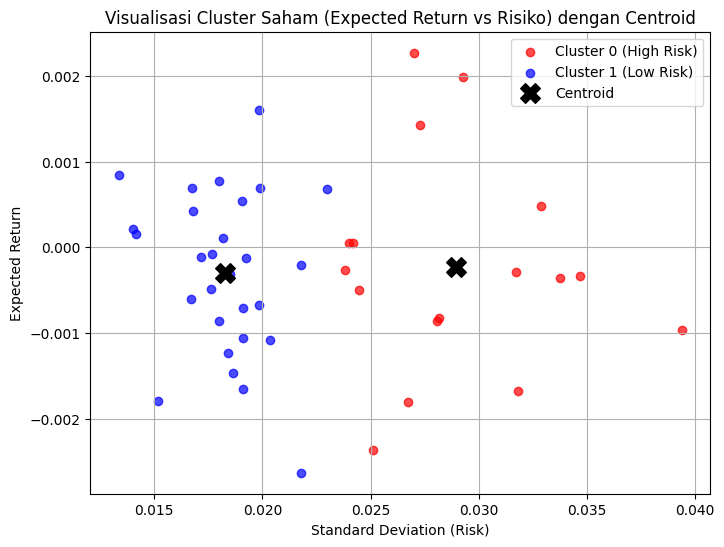

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data cluster yang sudah kamu punya (contoh dari tabel)
cluster0_returns = cluster0["Expected Return"]
cluster0_std = cluster0["Std Dev"]

cluster1_returns = cluster1["Expected Return"]
cluster1_std = cluster1["Std Dev"]

# Gabungkan data untuk hitung centroid manual
X0 = np.column_stack((cluster0_std, cluster0_returns))
X1 = np.column_stack((cluster1_std, cluster1_returns))

centroid0 = X0.mean(axis=0)  # [std_dev, expected_return]
centroid1 = X1.mean(axis=0)

# Plot scatter untuk cluster 0 & 1
plt.figure(figsize=(8,6))
plt.scatter(cluster0_std, cluster0_returns, color="red", label="Cluster 0 (High Risk)", alpha=0.7)
plt.scatter(cluster1_std, cluster1_returns, color="blue", label="Cluster 1 (Low Risk)", alpha=0.7)

# Plot centroid (hanya satu keterangan di legend)
plt.scatter([centroid0[0], centroid1[0]], [centroid0[1], centroid1[1]],
            color="black", marker="X", s=200, label="Centroid")

# Label
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Expected Return")
plt.title("Visualisasi Cluster Saham (Expected Return vs Risiko) dengan Centroid")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# === 5. Clustering (misalnya k=2 dari hasil elbow) ===
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Tambahkan cluster ke summary
summary["Cluster"] = clusters

print("\nRingkasan dengan Cluster:")
print(summary)

# Tabel cluster 0
cluster0 = summary[summary["Cluster"] == 0]
print("\nTabel Cluster 0:")
print(cluster0)

# Tabel cluster 1
cluster1 = summary[summary["Cluster"] == 1]
print("\nTabel Cluster 1:")
print(cluster1)

# Tabel cluster 2
cluster1 = summary[summary["Cluster"] == 2]
print("\nTabel Cluster 2:")
print(cluster1)


Ringkasan dengan Cluster:
      Expected Return  Variance   Std Dev  Cluster
ACES         0.000684  0.000528  0.022985        0
BBRI        -0.001228  0.000339  0.018409        1
EXCL         0.000696  0.000395  0.019870        1
ITMG         0.000152  0.000200  0.014137        1
PTBA         0.000536  0.000362  0.019032        1
ADRO         0.000480  0.001082  0.032898        2
BBTN        -0.000207  0.000474  0.021776        0
GGRM        -0.001788  0.000230  0.015162        1
KLBF        -0.000603  0.000279  0.016688        1
AMMN         0.001422  0.000745  0.027297        0
AKRA        -0.001055  0.000364  0.019078        1
BMRI        -0.000119  0.000371  0.019256        1
GOTO        -0.000333  0.001202  0.034667        2
MAPI        -0.000862  0.000789  0.028087        0
SIDO         0.000778  0.000324  0.018010        1
AMRT         0.000106  0.000330  0.018170        1
BRIS         0.002270  0.000729  0.027003        0
HRUM        -0.000825  0.000793  0.028152        0
MBMA

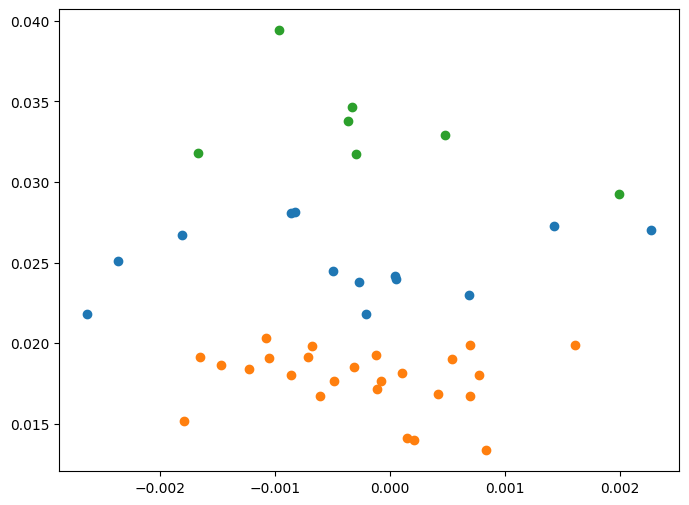

In [16]:
# === 6. Visualisasi Cluster ===
plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    plt.scatter(
        summary[summary["Cluster"] == cluster]["Expected Return"],
        summary[summary["Cluster"] == cluster]["Std Dev"],
        label=f"Cluster {cluster}"
    )